# Setup

In [1]:
import networkx as nx
from operator import itemgetter
import matplotlib.pyplot as plt
import numpy as np


plt.style.use('seaborn')

# Utilities

In [2]:
def print_graph_information (graph: nx.Graph):
    print(f'N = {graph.number_of_nodes()}')
    
    cum_sum = 0
    for _, degree in graph.degree():
        cum_sum += degree
        
    print(f'<k> = {cum_sum / graph.number_of_nodes()}')
    
def plot_degree_distribution (graph: nx.Graph, title: str): 
    degree_distribution = {}
    for _, degree in graph.degree():
        if degree in degree_distribution.keys():
            degree_distribution[degree] += 1
        else:
            degree_distribution[degree] = 1
            
    pairs = [(key, value) for key, value in degree_distribution.items()]
    pairs.sort(key=itemgetter(0))
    
    X = [pair[0] for pair in pairs]
    y = [pair[1] for pair in pairs]
            
    plt.figure(figsize=(7, 4))
    plt.bar(X, y)
    plt.xlim(0, 25)
    
    plt.title(title)
    plt.xlabel('Degree, k')
    plt.ylabel('Number of Nodes, n')
    
    plt.show()

# Results
## ER Model

In [3]:
er_graph = nx.erdos_renyi_graph(n=10000, p=0.001)

In [4]:
print_graph_information(er_graph)

N = 10000
<k> = 9.9862


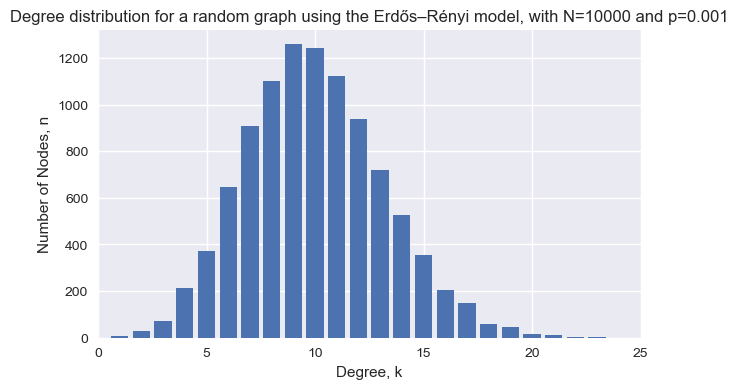

In [5]:
plot_degree_distribution(er_graph, title='Degree distribution for a random graph using the Erdős–Rényi model, with N=10000 and p=0.001')

## BA Model

In [6]:
ba_graph = nx.barabasi_albert_graph(n=10000, m=5)

In [7]:
print_graph_information(ba_graph)

N = 10000
<k> = 9.995


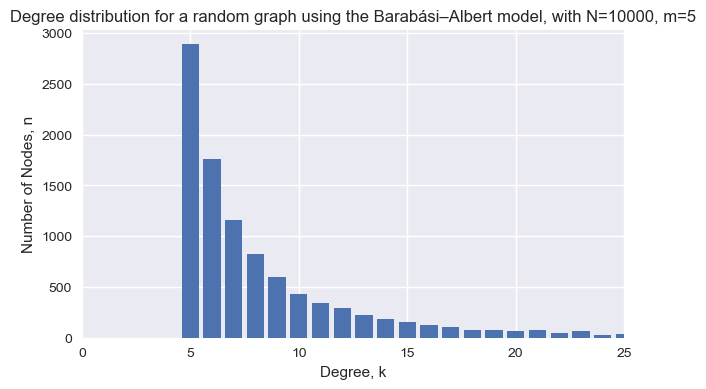

In [8]:
plot_degree_distribution(ba_graph, title='Degree distribution for a random graph using the Barabási–Albert model, with N=1000

# Mini Graphs

In [119]:
# Random Network
random_dict = {
    1: [2, 8],
    2: [1, 7],
    3: [6],
    4: [9],
    5: [6, 10],
    6: [1, 3, 5],
    7: [2, 9],
    8: [1],
    9: [4, 7],
    10: [5]
}

scalefree_dict = {
    1: [7, 8],
    2: [10],
    3: [5, 7],
    4: [7, 8],
    5: [3],
    6: [4, 7],
    7: [1, 3, 6, 9],
    8: [1, 4, 7, 10],
    9: [7],
    10: [2, 8]
}

In [123]:
def construct_edges (network_dict: dict) -> list:
    edges = []
    for node in network_dict.keys():
        for neighbour in network_dict[node]:
            if not ((node, neighbour) in edges or (neighbour, node) in edges):
                edges.append((node, neighbour))
    return edges

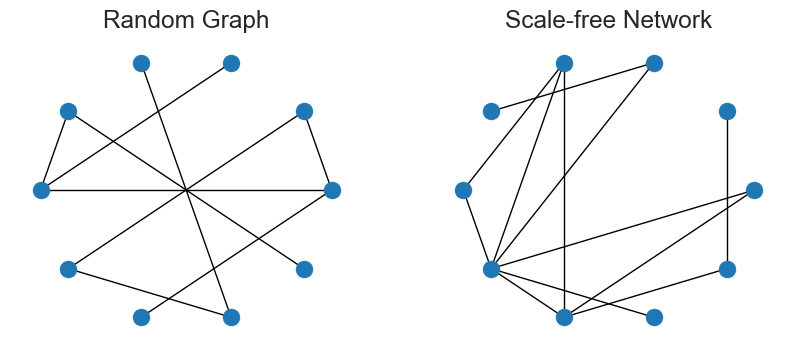

In [132]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Random
random_graph = nx.Graph()
random_graph.add_nodes_from(random_dict.keys())
random_graph.add_edges_from(construct_edges(random_dict))
random_pos = nx.circular_layout(random_graph)
nx.draw(random_graph, random_pos, axes[0], node_size=150)
axes[0].set_title('Random Graph')
axes[0].title.set_fontsize(17.5)

# Scale-free
scalefree_graph = nx.Graph()
scalefree_graph.add_nodes_from(scalefree_dict.keys())
scalefree_graph.add_edges_from(construct_edges(scalefree_dict))
scalefree_pos = nx.circular_layout(scalefree_graph)
nx.draw(scalefree_graph, scalefree_pos, axes[1], node_size=150)
axes[1].set_title('Scale-free Network')
axes[1].title.set_fontsize(17.5)

plt.show()